In [2]:
import numpy as np
import pandas as pd
import fileinput
import matplotlib.pyplot as plt

# DATA PRE-PROCESSING
Reading the given flipkart csv file

In [3]:
messages=pd.read_csv('raw_data.csv',sep=',',names=['uniq_id','crawl_timestamp','product_url','product_name','product_category_tree','pid','retail_price','discounted_price','image','is_FK_Advantage_product','description','product_rating','overall_rating','brand','product_specifications'])
messages

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
1,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999,379,"[""http://img5a.flixcart.com/image/short/u/4/a/...",FALSE,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
2,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157,22646,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",FALSE,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
3,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999,499,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",FALSE,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
4,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699,267,"[""http://img5a.flixcart.com/image/short/6/2/h/...",FALSE,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500,730,"[""http://img6a.flixcart.com/image/wall-decorat...",FALSE,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19997,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429,1143,"[""http://img6a.flixcart.com/image/sticker/z/g/...",FALSE,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19998,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299,999,"[""http://img5a.flixcart.com/image/sticker/b/s/...",FALSE,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499,1199,"[""http://img5a.flixcart.com/image/sticker/4/2/...",FALSE,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""ke

As we only need to predict major product categories from the description, the only relevant columns would be 'product_category_tree' and 'description'. Thus I created a product dataframe which stores these 2 columns. I also remove rows with null values.

In [4]:
product = messages[['product_category_tree','description']]
print(len(product))
product=product.dropna()
print(len(product))


20001
19999


The product category tree lists the subcategory of the product too, but as we need only the primary category, I create a new column in my products dataframe ‘primary_category’ and store it after extracting it from the product_category_tree. I do that by partitioning the string based on ‘>>’ and then selecting the first partition and removing the first 2 chars i.e. ["

In [5]:

product=product.drop([0])
def extract(s):
    partitioned_string = s.partition(' >>')
    return partitioned_string[0][2:]
product['primary_category']=product['product_category_tree'].apply(extract)
product

,product_category_tree,description,primary_category
1,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Clothing
2,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,Furniture
3,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,Footwear
4,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Clothing
5,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Pet Supplies
...,...,...,...
19996,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy WallDesign Small Vinyl Sticker for Rs.730 ...,Baby Care
19997,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Baby Care
19998,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Baby Care
19999,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Elite Collection Medium Acrylic Sticker fo...,Baby Care


# DATA VISUALISATION
I use the describe function and notice that there are 266 primary categories spanning 19998 products. The most frequent is ‘Clothing’ with 6197 products

In [6]:
product['primary_category'].describe()

count        19998
unique         266
top       Clothing
freq          6197
Name: primary_category, dtype: object

## BAR CHART
A bar chart showing the freuquency of the extracted primary category of products

<AxesSubplot:>

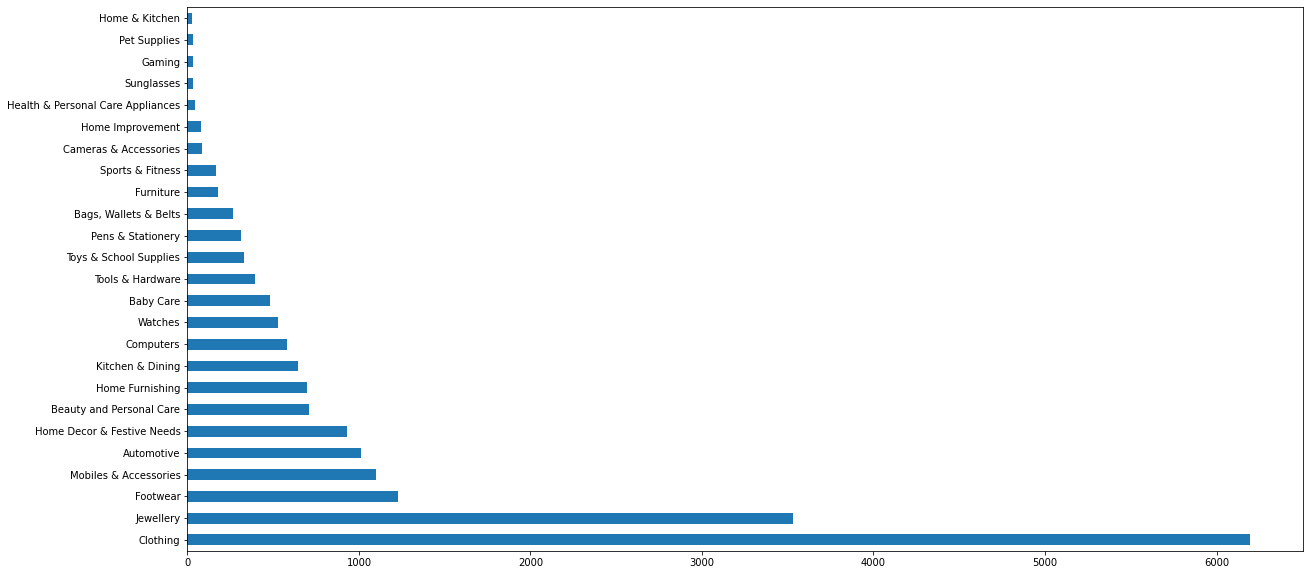

In [7]:
plt.figure(figsize=(20,10))
product['primary_category'].value_counts().nlargest(25).plot(kind='barh')

## PIE CHART
A pie chart showing the distribution of the top 20 most frequency primary categories

<AxesSubplot:>

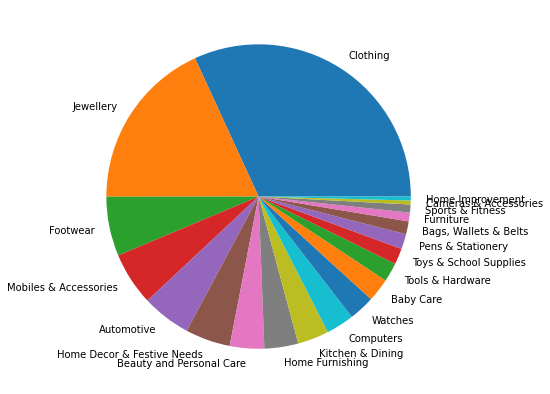

In [8]:
plt.figure(figsize=(7,7))
product['primary_category'].value_counts().nlargest(20).plot(kind="pie", label="")

## Cumulative Distribution
Seeing that clothing alone spans about 30% of the dataset, I get an intuition that maybe it's only some of the major categories with sufficient data for an accurate analysis.
So I calculate the cumulative frequencies and thus cumulative % of the top 28 primary categories .


,frequency,cf,%
primary_category,,,
Clothing,6197,6197,30.985
Jewellery,3531,9728,48.640
Footwear,1227,10955,54.775
Mobiles & Accessories,1099,12054,60.270
Automotive,1012,13066,65.330
Home Decor & Festive Needs,929,13995,69.975
Beauty and Personal Care,710,14705,73.525
Home Furnishing,699,15404,77.020
Kitchen & Dining,647,16051,80.255


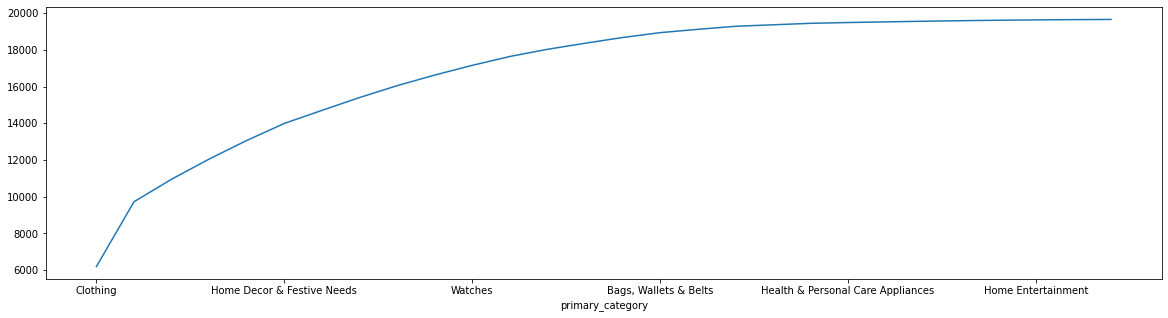

In [9]:
plt.figure(figsize=(20,5))
product.value_counts('primary_category').nlargest(28).cumsum().plot()
product.value_counts('primary_category').nlargest(28).cumsum()
df= pd.DataFrame(product.value_counts('primary_category').nlargest(28),columns =['frequency'])
df['cf']=product.value_counts('primary_category').nlargest(28).cumsum()
df['%']=product.value_counts('primary_category').nlargest(28).cumsum()/200
df

# Analysis of Data
These top 28 most frequent categories alone occupy 98.3% of the dataset i.e. 19661/19998 items.Thus we can remove all the remaining categories for a more accurate data analysis from the set.
The remaining 337 products are spread over 234 categories, and there are <10 entries for each such category, thus we should exclude these categories.


In [10]:
product['frequency']=product.groupby(by='primary_category')['primary_category'].transform('count')
rslt_df = product.loc[product['frequency'] > 9]
dataset = rslt_df[['primary_category','description']]
dataset = dataset.reset_index(drop=True)
dataset

,primary_category,description
0,Clothing,Key Features of Alisha Solid Women's Cycling S...
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...
3,Clothing,Key Features of Alisha Solid Women's Cycling S...
4,Pet Supplies,Specifications of Sicons All Purpose Arnica Do...
...,...,...
19656,Baby Care,Buy WallDesign Small Vinyl Sticker for Rs.730 ...
19657,Baby Care,Buy Wallmantra Large Vinyl Stickers Sticker fo...
19658,Baby Care,Buy Elite Collection Medium Acrylic Sticker fo...
19659,Baby Care,Buy Elite Collection Medium Acrylic Sticker fo...


# DATA CLEANING
I clean the data obtained- i.e. remove punctuation marks, extra spaces, special characters etc. i.e. everything except for regular expressions having [a-zA-Z] is removed.
Next, I remove the stop words in the english language like “the, a , and” etc that don’t help much in distinguishing one category from another.
This is followed by the stemming of the words in the description, to get their roots.

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
ps=PorterStemmer()

In [12]:
dataset.to_csv('final.csv')

In [13]:
corpus=[]
for i in range(len(dataset)):
    review=re.sub('[^a-zA-Z]',' ',dataset['description'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

# TRAINING AND TESTING
1. First of all I split the entire data set into 2- the training data (80%) and testing data(20%).
2. I train the model to predict the category using the training data and test its accuracy using the testing data(20%).
3. The model training is done using the count vectorizer, which uses the bag of words technique to find the frequency of occurrence of several words across descriptions.
4. I use the Multinomial Naive Bytes Algorithm and provide it with the countvectorizer  obtained and the associated descriptions to train the model.
5. I use the trained model so obtained to predict the categories of the remaining 20% of the dataset and the accuracy obtained is 93.77% 


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
Y=dataset['primary_category'].values
X_train,X_test,Y_train,Y_test=train_test_split(corpus,Y,test_size=0.2,random_state=0)
X_train = cv.fit_transform(X_train)
category_predict_model=MultinomialNB().fit(X_train,Y_train)
X_test = cv.transform(X_test)
Y_pred=category_predict_model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
print(conf)

[[ 196    0    0    1    0    0    0    0    0    0    0    0    0    1
     1    0    0    0    0    1    0    0    0    0    0    0    0    0]
 [   1   61    0    1    0   11    0    0    1    0    0    0    0    2
     0   11    0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    0   33    0    0    2    0    0    3    0    0    0    0    0
     0    0    0   13    0    0    0    0    0    0    0    0    1    0]
 [   0    2    0  145    0    0    0    0    0    1    0    0    0    0
     0    0    0    4    0    0    0    0    2    0    1    0    0    0]
 [   0    0    0    7    2    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1   12    0    2    0 1233    0    0    0    0    0    0    0    1
     0    0    0    1    0    0    0    0    0    0    3    0    0    0]
 [   0    0    2    1    0    0   85    0    0    0    0    0    0    0
     0    0    0   18    1    2    0    0    0    0    0  

In [18]:
print(accuracy*100)

93.77065853038393


The accuracy of prediction obtained using this model is 93.77%. 

### Notes and Observations:
1. I used the count vectorizer instead of the tf_idf vectorizer, as the classes in the dataset are skewed, as discussed in the visualization section. Tf_idf is better to use when the data is almost equally distributed among all classes. I tried using tf_idf vectorizer, and obtained a reduced accuracy of 86.33%
2. We can also try lemmatization instead of stemming the words:
Using that I get an accuracy of 93.69%, which hardly differs from the accuracy obtained using stemming.

### Using TF_IDF Vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv= TfidfVectorizer()
Y=dataset['primary_category'].values
X_train,X_test,Y_train,Y_test=train_test_split(corpus,Y,test_size=0.2,random_state=0)
X_train = tv.fit_transform(X_train)
category_predict_model=MultinomialNB().fit(X_train,Y_train)
X_test = tv.transform(X_test)
Y_pred=category_predict_model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
conf=confusion_matrix(Y_test,Y_pred)
print(accuracy*100)
print(conf)

86.49885583524028
[[ 194    0    0    0    0    2    0    0    0    0    0    0    0    1
     0    0    0    2    0    1    0    0    0    0    0    0    0    0]
 [   0   36    0    0    0   34    0    0    0    0    0    0    0    6
     0    9    0    3    1    0    0    0    0    0    0    0    0    0]
 [   0    0    9    0    0   26    0    0    1    0    0    0    0    0
     0    0    0   15    0    1    0    0    0    0    0    0    0    0]
 [   0    0    0  100    0   11    0    0    0    1    0    0    0    1
     0    0    0   42    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    8    0    2    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1252    0    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    1    0    0    1   81    0    0    0    0    0    0    0
     0    0    0   21    0    5    0    

In [24]:
print(accuracy*100)

86.49885583524028


As mentioned aboce, using a TF_IDF vectorizer reduces the accuracy due to the skewed datset instead of an evenly distributed dataset.